# Import dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification

Load the data

In [2]:
data = pd.read_csv('Cancer_dataset.csv')

# Exploratory Data Analysis


In [3]:
data.shape

(569, 33)

In [4]:
# drop id and unknown column with NaN values
data.drop(columns = 'Unnamed: 32', axis=1, inplace = True)  
data.drop(columns = 'id', axis=1, inplace = True)
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
# check data types and missing values
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#Statistical summary of data using describe function
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
# convert categorical data to numerical data
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['diagnosis'])
data['diagnosis'] = labels
data['diagnosis'].value_counts()


diagnosis
0    357
1    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

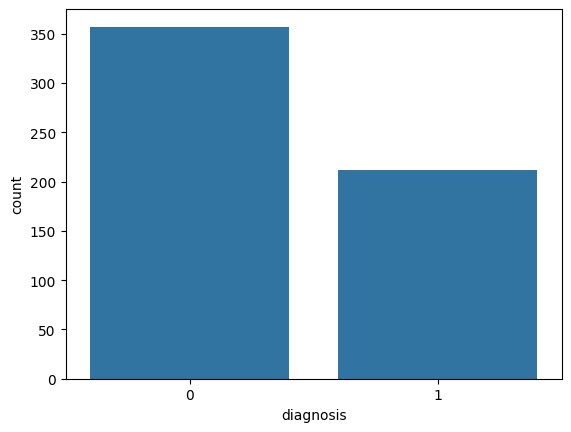

In [9]:
# plotting the diagnosis column
sns.countplot(x='diagnosis', data=data)

In [10]:
# Grouping data by diagnosis and calculating the mean of each feature 
data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


It's apparent that, for the majority of features, the average values are greater in Malignant cases (denoted by 1) and lower in Benign cases (denoted by 0).

Implementing feature reduction to optimize computing

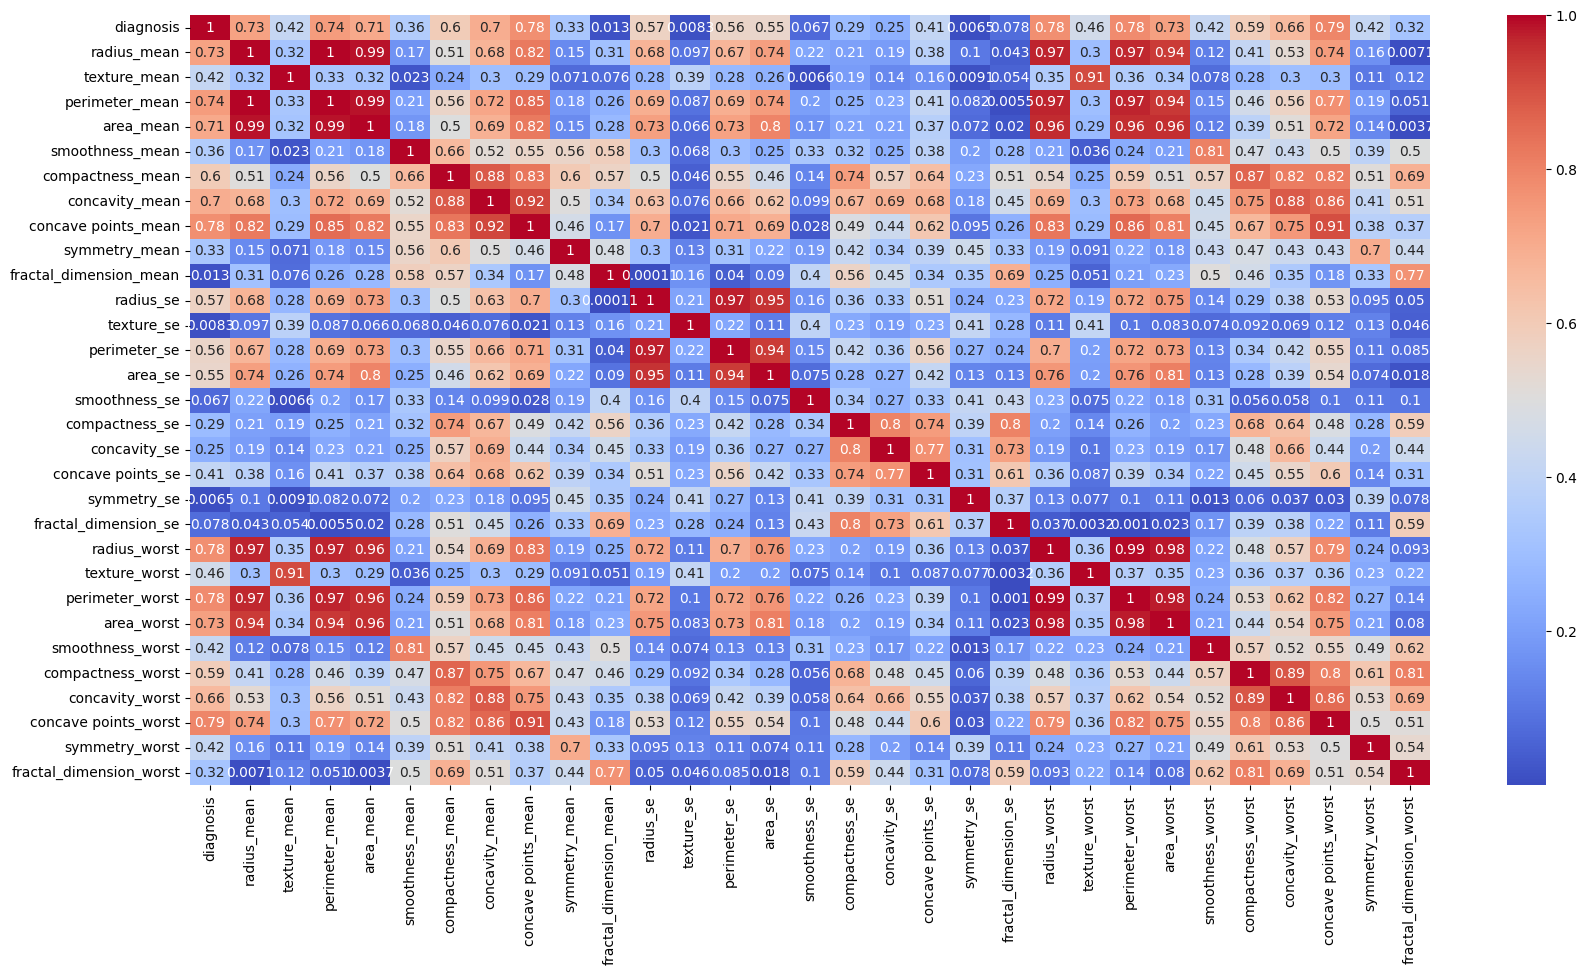

In [11]:
# building a correlation matrix to find features with high correlation 
correlation_matrix = data.corr().abs()
upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
upper_triangle = correlation_matrix.where(upper_triangle_mask)
threshold = 0.97
# print corelation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()


Highly correlated features can introduce multicollinearity into the dataset, which can negatively impact the performance of certain machine learning algorithms

This code Identifies and drops features with a correlation coefficient greater than 0.97 to reduce multicollinearity, thereby improving the model's performance and interpretability. The pair plot helps visualize the relationships between the highly correlated features and the target variable.

Features to drop: ['perimeter_mean', 'area_mean', 'perimeter_se', 'perimeter_worst', 'area_worst']
Number of features to drop: 5


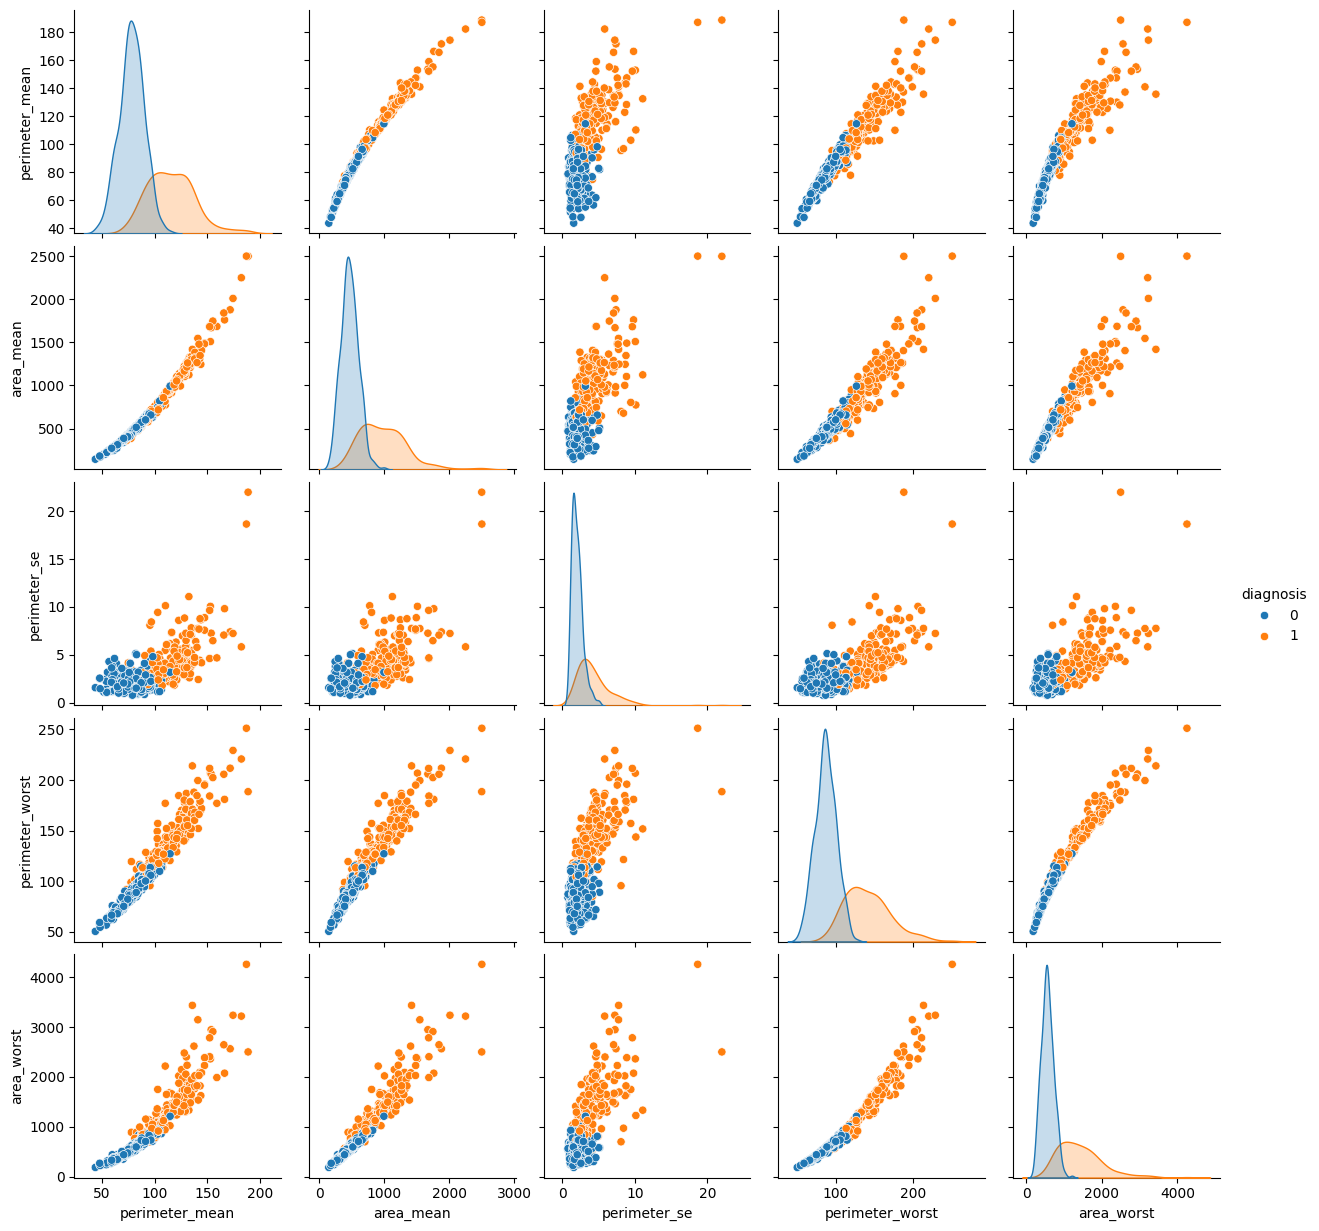

In [12]:
features_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
print("Features to drop:", features_to_drop)
print("Number of features to drop:", len(features_to_drop))

# creating pair plot for the features with high correlation
sns.pairplot(data[features_to_drop + ['diagnosis']], hue='diagnosis')


Not dropping the similar features for unsupervised learning to be able to work better

In [ ]:
# drop features with high correlation
# data.drop(columns=features_to_drop, inplace=True)

# Clustering Algorithms

## k-means

## Gaussian Mix Model

# Dimensionality Reduction


## PCA

## ICA

## LDA


# Neural Networks

In [14]:
# Splitting the data into features and target
X = data.drop(columns='diagnosis', axis=1)
Y = data['diagnosis']

In [15]:
# Standardizing the data

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [16]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(569, 25) (455, 25) (114, 25)


In [17]:
# Setting up the layers of Neural Network
# Adding dropout layers to prevent overfitting

model = Sequential([
                        Flatten(input_shape=(data.shape[1]-1,)),
                        Dense(64, activation='relu'),
                        Dropout(0.2),         
                        Dense(64, activation='sigmoid'),                         
                        Dropout(0.2),
                        Dense(2, activation='softmax')
])

In [18]:
# Compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Training the Neural Network
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=50)

Epoch 1/50
15/15 [==============================] - 1s 14ms/step - loss: 0.8133 - accuracy: 0.6308 - val_loss: 0.5365 - val_accuracy: 0.8333
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.6879 - val_loss: 0.4143 - val_accuracy: 0.9035
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5432 - accuracy: 0.7648 - val_loss: 0.3555 - val_accuracy: 0.9123
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7692 - val_loss: 0.3395 - val_accuracy: 0.8947
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7868 - val_loss: 0.3236 - val_accuracy: 0.9123
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.7890 - val_loss: 0.3153 - val_accuracy: 0.9035
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.7714 - val_loss: 0.3127 - val_accuracy: 0.9035
Epoch 8/50
15/15 [=

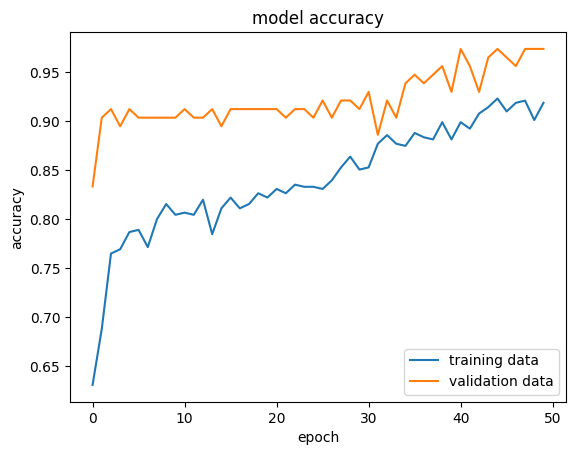

In [20]:
# Evaluating the model through accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

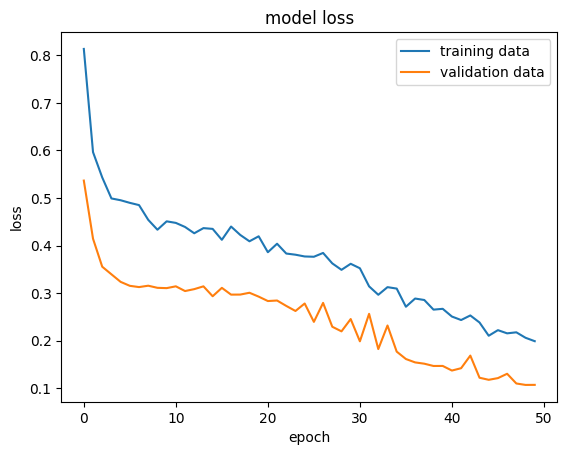

In [21]:
# Evaluating the model through loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

4/4 [==============================] - 0s 0s/step - loss: 0.1071 - accuracy: 0.9737
Accuracy: 97.37%
4/4 [==============================] - 0s 5ms/step


Text(95.72222222222221, 0.5, 'Truth')

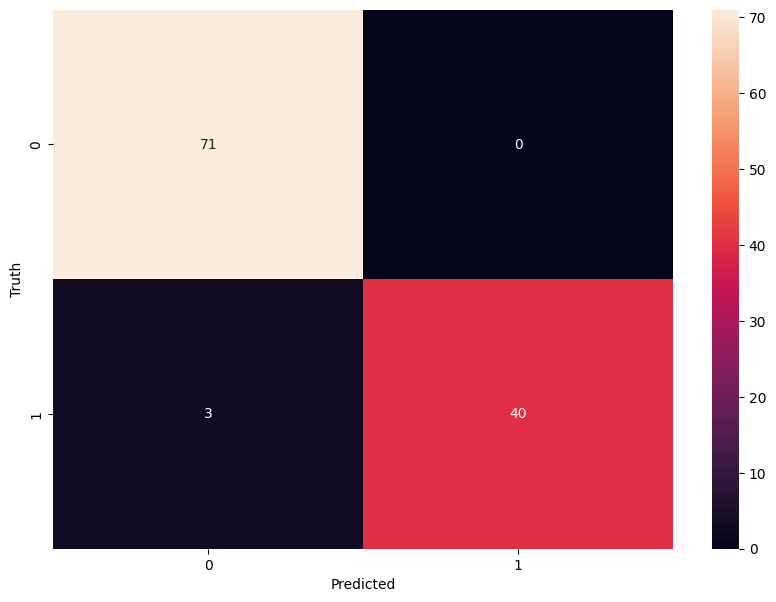

In [22]:

# Evaluating the model on test data
loss, accuracy = model.evaluate(X_test, Y_test)
neural_network_accuracy = accuracy * 100
print(f'Accuracy: {neural_network_accuracy:.2f}%')

# Predictions
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
